In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h1 style="color:lightblue">Loading and Checking if cleaning is needed</h1>  

In [3]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

### Checking Customers

In [23]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate,SignupDateNew
0,C0001,Lawrence Carroll,South America,2022-07-10,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15,2022-08-15


In [25]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CustomerID     200 non-null    object        
 1   CustomerName   200 non-null    object        
 2   Region         200 non-null    object        
 3   SignupDate     200 non-null    object        
 4   SignupDateNew  200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 7.9+ KB


In [7]:
customers.duplicated().sum()

0

### Checking Products

In [9]:
products = pd.read_csv('Products.csv')
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [10]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


### Checking Transactions

In [11]:
transactions = pd.read_csv('Transactions.csv')
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [12]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [14]:
transactions.duplicated().sum()

0

## Data is clean:
1. No missing values
2. No duplicated rows

In [172]:
# Helper Function to get name from customer id
def customerIdtoname(ID):
    return customers[customers.CustomerID == ID].CustomerName.values[0]

In [173]:
# Helper Function to get name from customer id
def productIdtoname(ID):
    return products[products.ProductID == ID].ProductName.values[0]

#

<h1 style="color:lightblue">Performing EDA</h1>

<h2 style="color:red">A . Customers</h2>

In [117]:
#  First Converting string date column into pandas datecloumn
customers['SignupDate'] = pd.to_datetime(customers.SignupDate)

<h3 style="color:lightgreen">1 . Region Wise</h3>

1. There are roughly same number of customers in each Region
2. South America has highest and Asia has lowest

In [15]:
customers.Region.value_counts()

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

<Axes: xlabel='Region'>

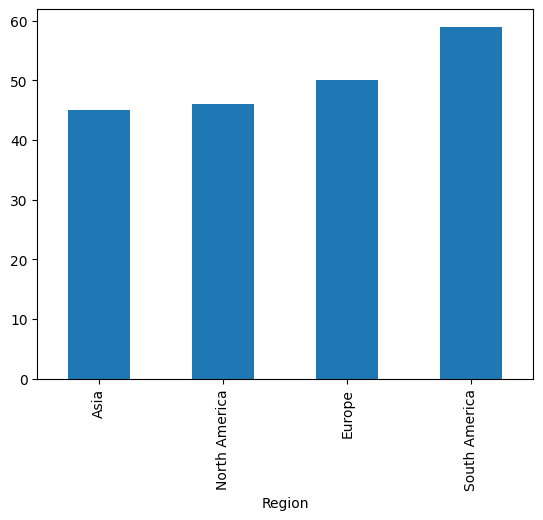

In [118]:
customers.Region.value_counts().sort_values().plot.bar()

# 

<h3 style="color:lightgreen">2 . Date wise Sign Up trends</h3>

1. 1st cusotmer was on 22nd Jan, 2022
2. Last cusotmer was on 28nd Dec, 2024
3. Customers sign ups are roughly same for all 3 years (22,23,24) with 2024 being highest
4. Sign up are more in first 6 months than last 6 months
5. Hihest number of sign ups happend in Feb, April and March, lowest in June and July
6. Highest number of sign ups happen at 13th day of month.
7. There is a wave like pattern in sign ups happening in day wise, clearly suggests this data is synthetic
8. More number of sign ups happen at Saturaday and Sun

In [119]:
customers.SignupDate.min()

Timestamp('2022-01-22 00:00:00')

In [120]:
customers.SignupDate.max()

Timestamp('2024-12-28 00:00:00')

<Axes: xlabel='SignupDate'>

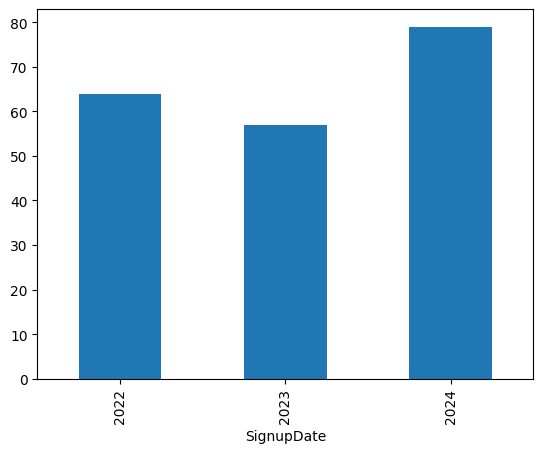

In [123]:
customers.SignupDate.dt.year.value_counts().sort_index().plot.bar()

<Axes: xlabel='SignupDate'>

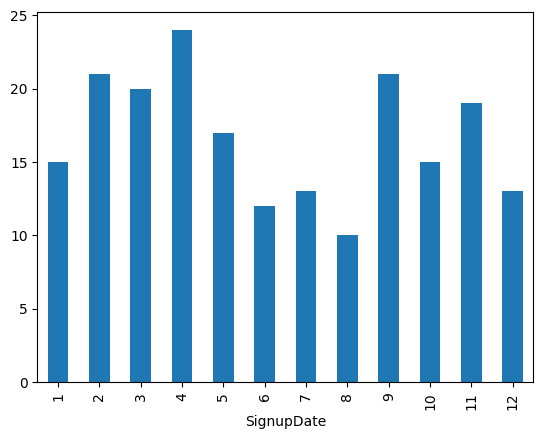

In [122]:
customers.SignupDate.dt.month.value_counts().sort_index().plot.bar()

<Axes: xlabel='SignupDateNew'>

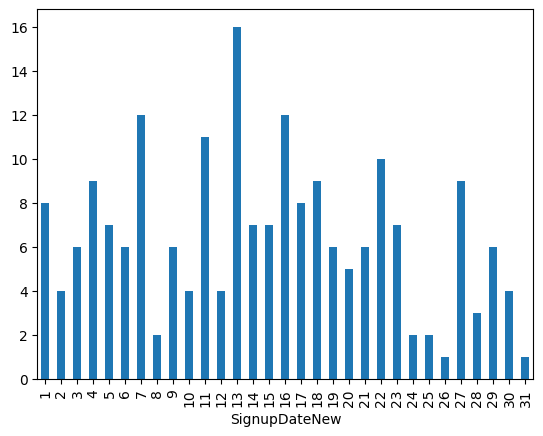

In [89]:
customers.SignupDateNew.dt.day.value_counts().sort_index().plot.bar()

<Axes: xlabel='SignupDateNew'>

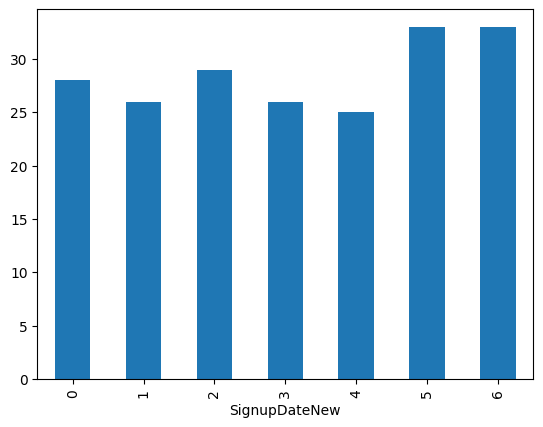

In [87]:
customers.SignupDateNew.dt.weekday.value_counts().sort_index().plot.bar()

#

#

<h2 style="color:red">B . Product</h2>

1. 4 category of products have roughly same number of products (23,25,26,26)
2. Price distribution of combined data for all categories suggest data is mostly uniform, again suggesting data is synthetically generated
3. According to kde plot below, price distribution of Books and Clothing is almost similar.
4. Most expensive items are from Books and least expensive are from Home Decor

In [124]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [126]:
products.Category.value_counts().sort_values()

Category
Home Decor     23
Clothing       25
Books          26
Electronics    26
Name: count, dtype: int64

<Axes: xlabel='Category'>

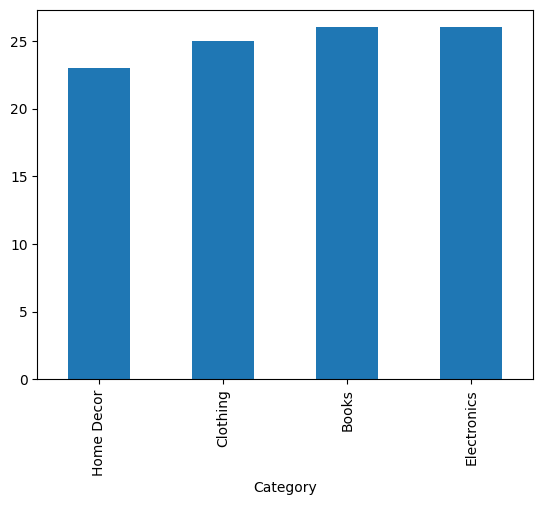

In [127]:
products.Category.value_counts().sort_values().plot.bar()

In [33]:
products.Price.describe()

count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64

<Axes: >

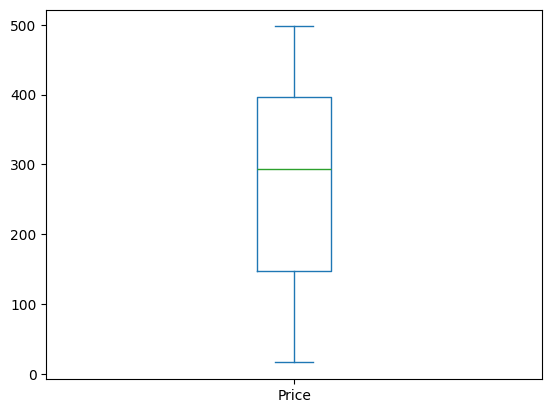

In [131]:
products.Price.plot.box()

In [90]:
products.groupby('Category')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Books,26.0,292.212308,153.800135,33.59,154.2975,337.94,419.2125,497.76
Clothing,25.0,263.720000,157.965038,18.82,126.3400,303.50,389.2000,481.78
Electronics,26.0,275.353462,137.056612,16.08,168.8000,282.72,394.3650,459.86
Home Decor,23.0,235.020000,122.236552,41.18,142.3800,235.58,314.9750,454.53


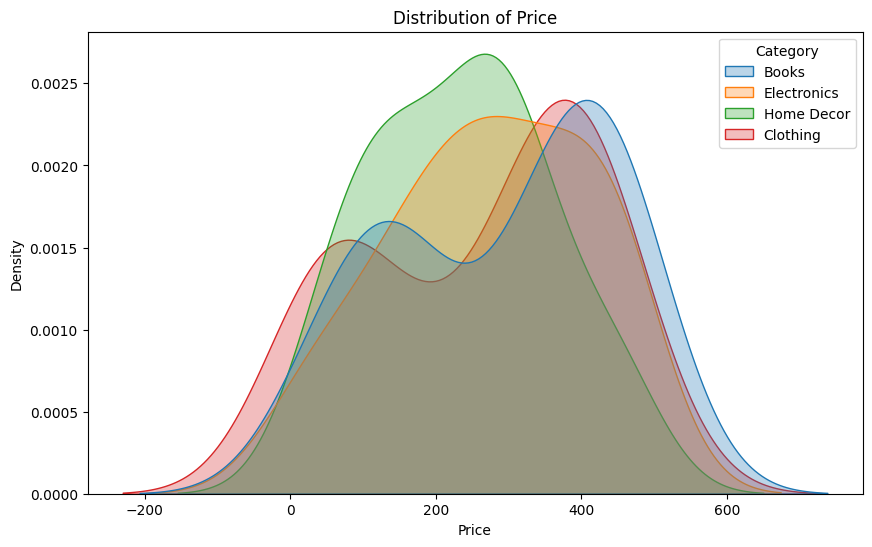

In [132]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=products, x="Price", hue="Category", fill=True, common_norm=False, alpha=0.3)
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Distribution of Price")
plt.show()

#

#

<h2 style="color:red">C . Transactions</h2>

<h3 style="color:lightgreen">1. Price Wise </h3>

1. Total Value distribution of all transactions is somewhat right skewed
2. 75 % transactions are below 1000 total value, with lowest:16 and highest:1991
3. Highest price product bought is 'TechPro Textbook' (P075)
4. Lowest price product bought is 'SoundWave Smartwatch' (P056)

In [177]:
productIdtoname('P056')

'SoundWave Smartwatch'

In [135]:
transactions.TransactionDate = pd.to_datetime(transactions.TransactionDate)

In [51]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [80]:
transactions.TotalValue.describe()

count    1000.000000
mean      689.995560
std       493.144478
min        16.080000
25%       295.295000
50%       588.880000
75%      1011.660000
max      1991.040000
Name: TotalValue, dtype: float64

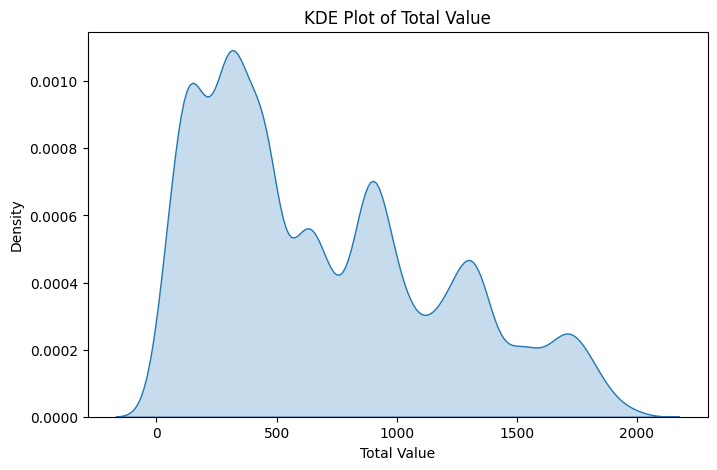

In [58]:

plt.figure(figsize=(8, 5))
sns.kdeplot(data=transactions, x="TotalValue", fill=True, bw_adjust=0.5)
plt.xlabel("Total Value")
plt.ylabel("Density")
plt.title("KDE Plot of Total Value")
plt.show()

<Axes: >

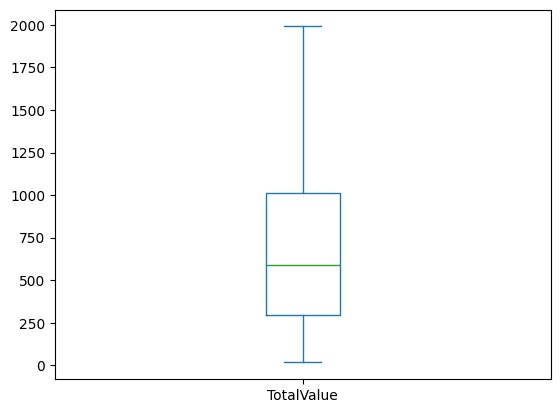

In [62]:
transactions.TotalValue.plot.box()

In [136]:
transactions.sort_values('Price',ascending=False)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
875,T00805,C0038,P075,2024-02-05 18:18:43,3,1493.28,497.76
873,T00643,C0137,P075,2024-05-21 09:00:57,3,1493.28,497.76
870,T00176,C0164,P075,2024-10-20 16:20:50,1,497.76,497.76
871,T00360,C0108,P075,2024-05-29 17:04:29,3,1493.28,497.76
872,T00367,C0161,P075,2024-03-27 07:31:28,2,995.52,497.76
...,...,...,...,...,...,...,...
852,T00949,C0169,P056,2024-02-16 14:52:24,4,64.32,16.08
851,T00916,C0099,P056,2024-11-10 19:32:15,4,64.32,16.08
850,T00774,C0095,P056,2024-01-07 14:19:49,2,32.16,16.08
849,T00584,C0112,P056,2024-06-02 17:24:55,1,16.08,16.08


#

<h3 style="color:lightgreen">2. Customer and Region wise </h3>

1. Region wise, South America pays more money
2. Customer 'William Adams'(C0156),'Abigail Jones'(C0109) have done highest transactions(11)
3. Most customers have 1-10 transactions with 5 being most common
4. In total, most customer have bought 1-22 items while 32 items being the highes Abigail Jones(C0109)


In [ ]:
customerIdtoname('C0109')

In [137]:
#  merging transactions and customrs
merged = pd.merge(transactions, customers, on="CustomerID")

In [64]:
merged.head(2)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,SignupDateNew
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,2024-09-04


In [138]:
merged.groupby('Region')['TotalValue'].sum()

Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64

<Axes: xlabel='Region'>

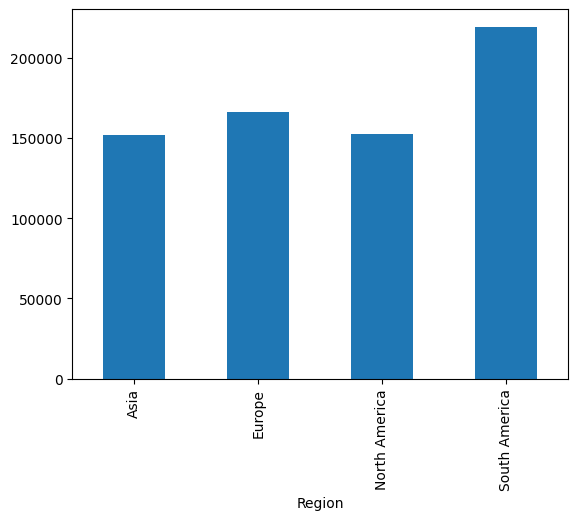

In [139]:
merged.groupby('Region')['TotalValue'].sum().plot.bar()

In [149]:
# transactions per user
entire.groupby('CustomerID')['TransactionID'].count().sort_values()

CustomerID
C0020     1
C0060     1
C0150     1
C0151     1
C0097     1
         ..
C0175    10
C0065    10
C0008    10
C0109    11
C0156    11
Name: TransactionID, Length: 199, dtype: int64

<Axes: ylabel='Frequency'>

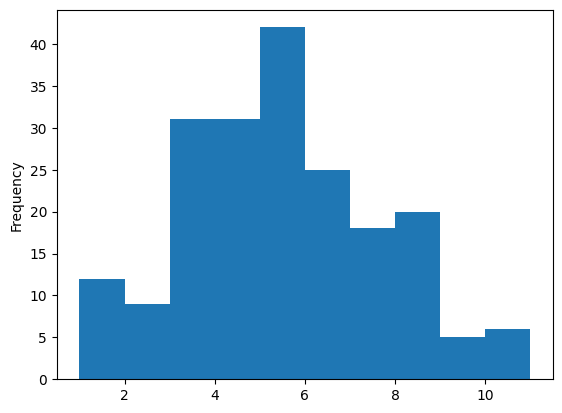

In [156]:
entire.groupby('CustomerID')['TransactionID'].count().sort_values().plot.hist()

In [112]:
# customer quantity dist
entire.groupby('CustomerID')['Quantity'].sum().sort_values()

CustomerID
C0097     1
C0058     1
C0150     2
C0033     2
C0130     2
         ..
C0065    27
C0075    28
C0156    28
C0165    30
C0109    32
Name: Quantity, Length: 199, dtype: int64

<Axes: ylabel='Frequency'>

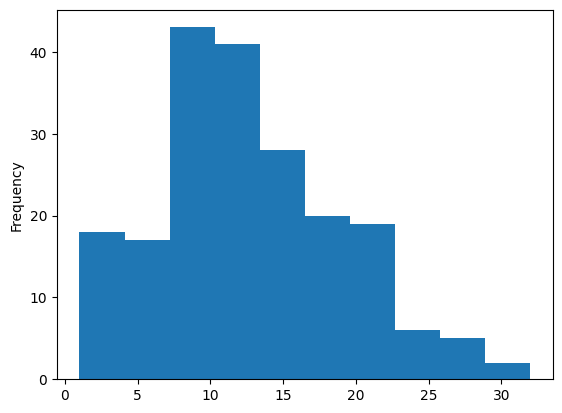

In [155]:
entire.groupby('CustomerID')['Quantity'].sum().sort_values().plot.hist()

#

<h3 style="color:lightgreen">3. Transaction Date Wise</h3>

1. Highest transaction appears on Jan and there is a wave like pattern (seasonality) present
2. In a month, Day wise seasonality present.
3. In a week, Day wise seasonality present.
4. Over 95% transactions happend in 2024

<Axes: xlabel='TransactionDate'>

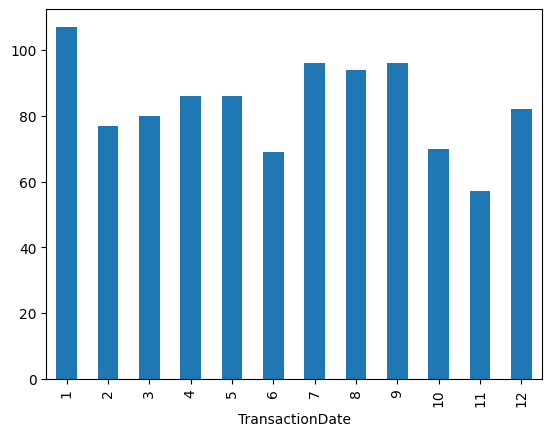

In [69]:
transactions["TransactionDate"].dt.month.value_counts().sort_index().plot(kind="bar")

<Axes: xlabel='TransactionDate'>

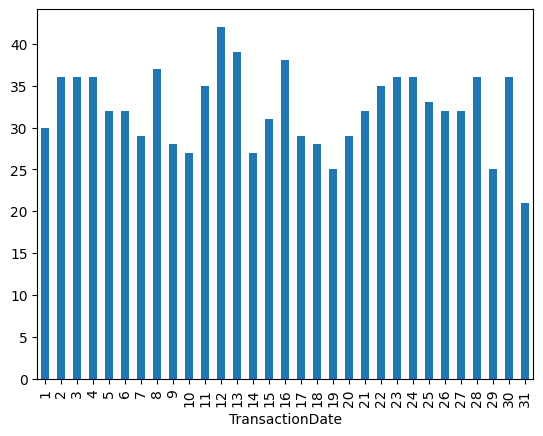

In [70]:
transactions["TransactionDate"].dt.day.value_counts().sort_index().plot(kind="bar")

<Axes: xlabel='TransactionDate'>

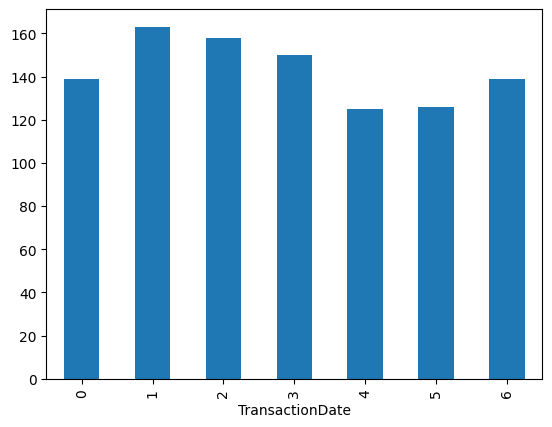

In [158]:
transactions["TransactionDate"].dt.weekday.value_counts().sort_index().plot(kind="bar")

<Axes: xlabel='TransactionDate'>

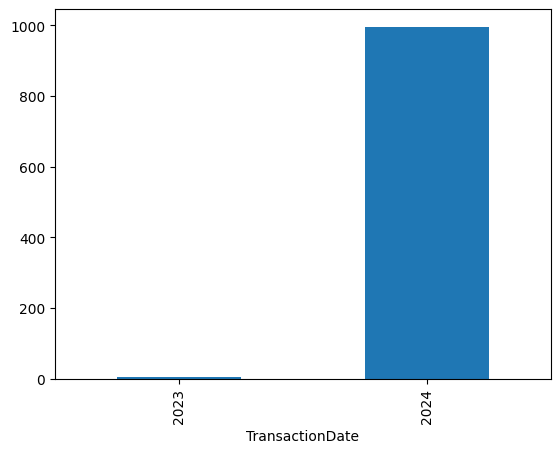

In [71]:
transactions["TransactionDate"].dt.year.value_counts().sort_index().plot(kind="bar")

#

<h3 style="color:lightgreen">4. Product and Product Quantity wise</h3>

1. Uniform amount of quanities are bought.(1,2,3,4) again suggests data is synthetic
2. Books are most sold items, followed by Home Decor
3. Books are bought for most number of transactions
4. Books bring about larger number of money transfer
5. Product 'SoundWave Cookbook'(P054),SoundWave Jeans(P059) are most sold while SoundWave Headphones(P031),SoundWave Mystery Book(P099) are least sold

In [ ]:
productIdtoname('P099')

In [73]:
entire =  pd.merge(merged, products, on="ProductID")

In [75]:
entire.head(2)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,SignupDateNew,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68


<Axes: xlabel='Quantity'>

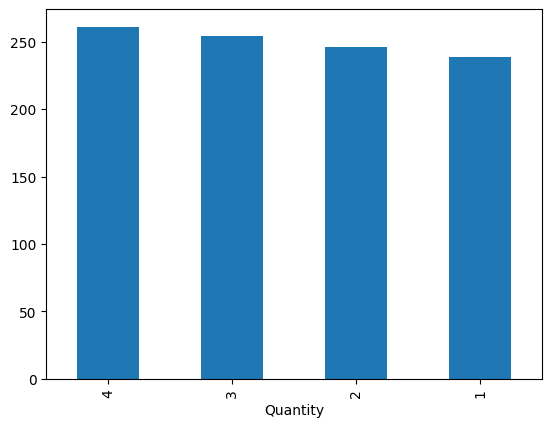

In [140]:
transactions.Quantity.value_counts().plot.bar() # quanity wise sells

<Axes: xlabel='Category'>

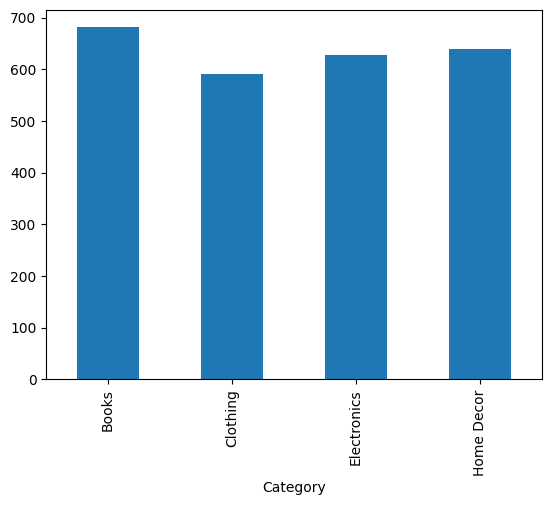

In [144]:
entire.groupby('Category')['Quantity'].sum().plot.bar() # total items sold per category

<Axes: xlabel='Category'>

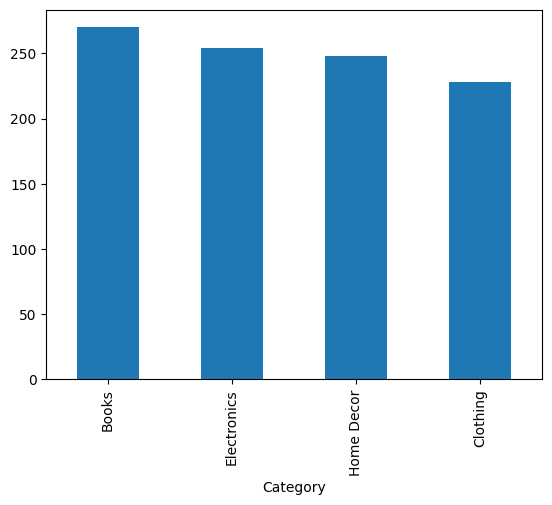

In [145]:
entire.Category.value_counts().plot.bar() # number of transactions per category

In [78]:
entire.groupby('Category')['TotalValue'].sum(). # category wise total value

Category
Books          192147.47
Clothing       166170.66
Electronics    180783.50
Home Decor     150893.93
Name: TotalValue, dtype: float64

<Axes: xlabel='Category'>

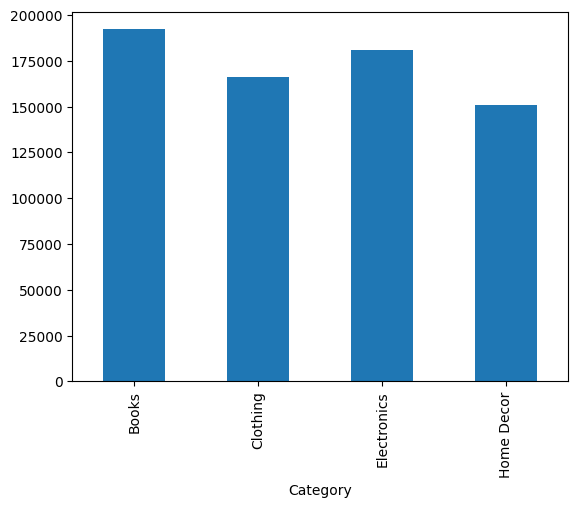

In [146]:
entire.groupby('Category')['TotalValue'].sum().plot.bar()

In [147]:
transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=True) # product wise sold items

ProductID
P031     9
P099    11
P024    12
P044    13
P060    13
        ..
P048    43
P079    43
P029    45
P059    46
P054    46
Name: Quantity, Length: 100, dtype: int64

<Axes: xlabel='ProductID'>

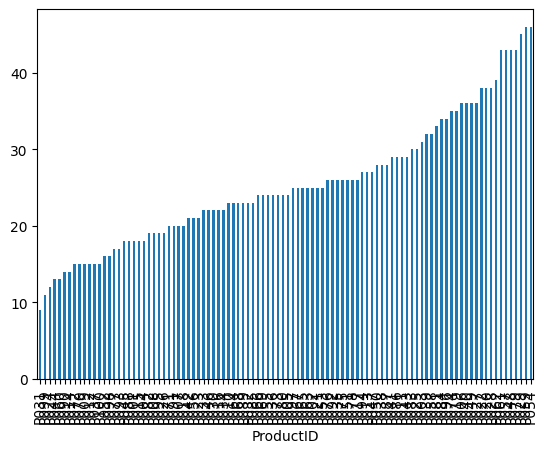

In [148]:
transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=True).plot.bar()

In [103]:
# lowest sold items
transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=True)[:10]

ProductID
P031     9
P099    11
P024    12
P044    13
P060    13
P090    14
P014    14
P072    15
P070    15
P009    15
Name: Quantity, dtype: int64

In [157]:
# most sold items
transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)[:10]

ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
P057    43
P048    43
P062    39
P020    38
P028    38
Name: Quantity, dtype: int64